In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import set_option
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions
import seaborn as sns
from pandas.plotting import scatter_matrix

1. In this assignment you will perform exploratory data analysis on the Boston dataset.
2. The dataset has been provided on Canvas.
3. Load the dataset into a Pandas dataframe.
4. Clean the data (if needed).

In [2]:
filename = 'boston.csv'
data = read_csv(filename)
data.head(5)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


5. The output in this data set is Medv (median price). The rest of the columns are
considered input. Separate the data into an input and output dataframes/Series. You
can ignore/eliminate categorical data.

In [3]:
# Split into input/output datasets (medv is output)
array = data.values
input_df = data.drop('medv', axis=1)
output_df = data['medv']

6. Perform normalization and standardization on the data. We normally normalize and
standardize the input frame and keep the output intact.
7. Put the new normalized input data frame and the output into a new data frame called
data_norm. Do the same for standardized data. Call the new data frame for
standardized data as data_stand.

In [17]:
data_norm = input_df.copy()
# Normalize
norm_scaler = Normalizer().fit(data_norm)
data_norm = norm_scaler.transform(data_norm)
# add output to normalized data
data_norm = pd.DataFrame(data_norm)
data_norm['medv'] = output_df

data_stand = input_df.copy()
# Standardize
stand_scaler = StandardScaler().fit(data_stand)
data_stand = stand_scaler.transform(data_stand)
# add output to standardized data
data_stand = pd.DataFrame(data_stand)
data_stand['medv'] = output_df
data_objects = ((data_norm, 'data_norm'), (data_stand, 'data_stand'))

8. Perform basic EDA, i.e. descriptive stats, plot the histograms and match/verify with
descriptive stats.

In [12]:
# Descriptive stats
for data, _ in data_objects:
    print(data.describe())

                0           1           2           3           4           5  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     0.376992    0.004452    0.020597    0.017083    0.000117    0.000899   
std      0.173580    0.010178    0.042268    0.010049    0.000437    0.000195   
min      0.002000    0.000013    0.000000    0.000891    0.000000    0.000580   
25%      0.222559    0.000146    0.000000    0.009582    0.000000    0.000772   
50%      0.433605    0.000447    0.000000    0.016578    0.000000    0.000875   
75%      0.519239    0.004698    0.024614    0.021253    0.000000    0.000971   
max      0.720316    0.101777    0.206154    0.058613    0.002224    0.001937   

                6           7           8           9          10          11  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     0.010490    0.110078    0.006625    0.013306    0.624834    0.030334   
std      0.002648    0.0470

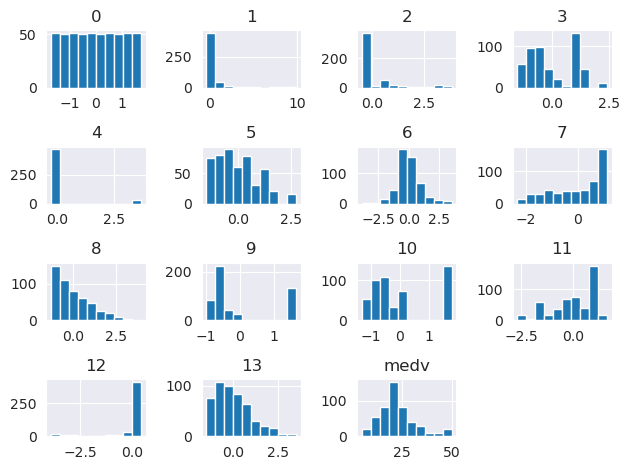

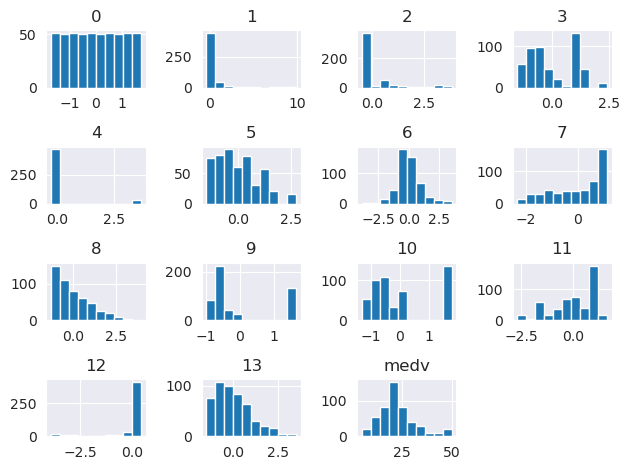

In [13]:
# Histograms
for data, _ in data_objects:
    data_stand.hist()
    plt.tight_layout()
    plt.show()

9. Continue with correlation analysis (calculate correlation and plot correlation heatmap) and scatter plots.

             0         1         2         3         4         5         6  \
0     1.000000  0.223159  0.020666 -0.087857  0.048703 -0.438646 -0.476631   
1     0.223159  1.000000 -0.206443  0.208104 -0.060410 -0.127003 -0.494577   
2     0.020666 -0.206443  1.000000 -0.502052 -0.030869 -0.273017  0.336761   
3    -0.087857  0.208104 -0.502052  1.000000  0.093970  0.456182 -0.321484   
4     0.048703 -0.060410 -0.030869  0.093970  1.000000  0.142864  0.084582   
5    -0.438646 -0.127003 -0.273017  0.456182  0.142864  1.000000  0.374072   
6    -0.476631 -0.494577  0.336761 -0.321484  0.084582  0.374072  1.000000   
7    -0.324343  0.048279 -0.455637  0.468565  0.116894  0.650884  0.092558   
8    -0.304727 -0.425992  0.621818 -0.570474 -0.062704 -0.147816  0.596129   
9     0.358826  0.610779 -0.321152  0.224815 -0.033931 -0.279157 -0.714831   
10   -0.008681  0.492745 -0.335888  0.464319 -0.062769 -0.018826 -0.650378   
11   -0.632219 -0.380392  0.009288 -0.077892 -0.022852  0.368658

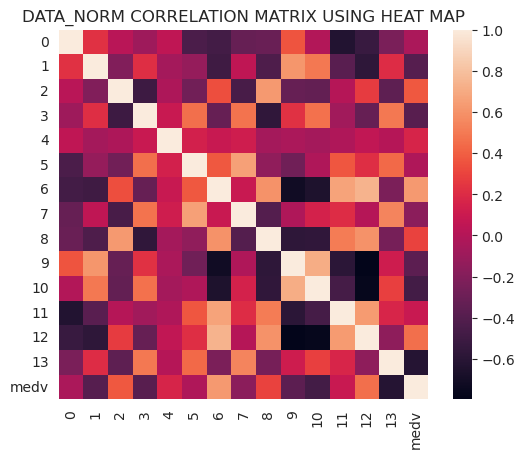

<Figure size 640x480 with 0 Axes>

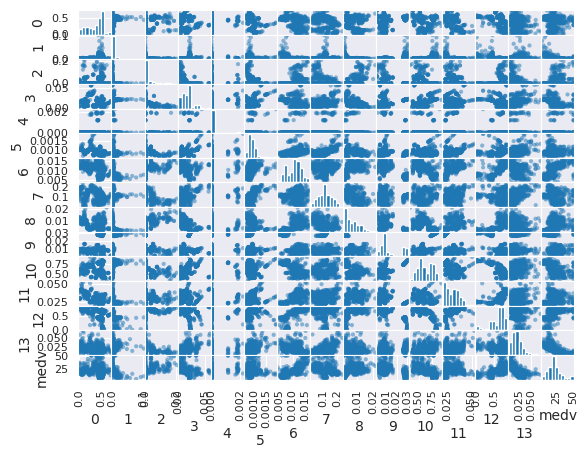

             0         1         2         3         4         5         6  \
0     1.000000  0.223159  0.020666 -0.087857  0.048703 -0.438646 -0.476631   
1     0.223159  1.000000 -0.206443  0.208104 -0.060410 -0.127003 -0.494577   
2     0.020666 -0.206443  1.000000 -0.502052 -0.030869 -0.273017  0.336761   
3    -0.087857  0.208104 -0.502052  1.000000  0.093970  0.456182 -0.321484   
4     0.048703 -0.060410 -0.030869  0.093970  1.000000  0.142864  0.084582   
5    -0.438646 -0.127003 -0.273017  0.456182  0.142864  1.000000  0.374072   
6    -0.476631 -0.494577  0.336761 -0.321484  0.084582  0.374072  1.000000   
7    -0.324343  0.048279 -0.455637  0.468565  0.116894  0.650884  0.092558   
8    -0.304727 -0.425992  0.621818 -0.570474 -0.062704 -0.147816  0.596129   
9     0.358826  0.610779 -0.321152  0.224815 -0.033931 -0.279157 -0.714831   
10   -0.008681  0.492745 -0.335888  0.464319 -0.062769 -0.018826 -0.650378   
11   -0.632219 -0.380392  0.009288 -0.077892 -0.022852  0.368658

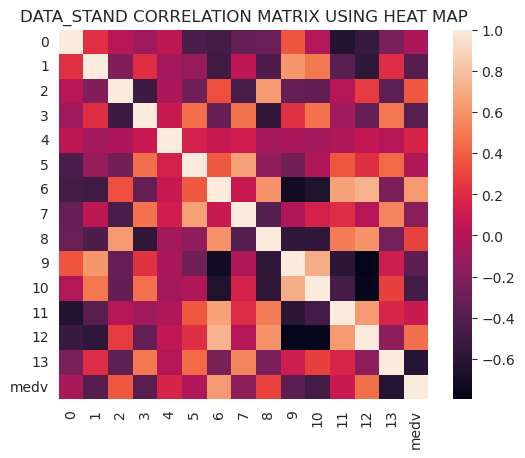

<Figure size 640x480 with 0 Axes>

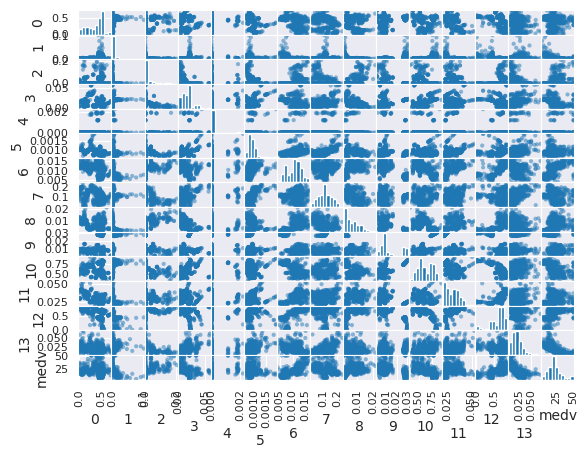

In [18]:
for data, name in data_objects:
    plt.figure() # new plot
    corMat = data_norm.corr(method='pearson')
    print(corMat)
    ## plot correlation matrix as a heat map
    sns.heatmap(corMat, square=True)
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)
    variable_name = f'{name}'.split('=')[0]
    plt.title(f"{variable_name.upper()} CORRELATION MATRIX USING HEAT MAP")
    plt.show()
    
    ## scatter plot of all data
    plt.figure()
    scatter_matrix(data_norm)
    plt.show()

11. Identify the high correlation columns from the headmap and compare the results from
those of the scatter plots. Do the results match? Explain.